In [1]:
# from OutputsAnalyser.run_timepoints_utils import get_timecols_df_for_DL, apply_phq_cutoff


ModuleNotFoundError: No module named 'OutputsAnalyser'

In [3]:
import pandas as pd

In [4]:
d = {}
df_fn = "/Users/orenkobo/Desktop/PhD/HebLingStudy/ts_data/Artifacts2/df_new_full__unsegmented_alldata_new_FINAL.csv"
et_scale_col = "x_gaze_location"
override_cutoff = [7,8]
df, timepoint_cols = get_timecols_df_for_DL(fn =df_fn, scale_col = et_scale_col)
df = apply_phq_cutoff(df,
                      neg_phq_cutoff = override_cutoff[0],
                      pos_phq_cutoff = override_cutoff[1])

NameError: name 'get_timecols_df_for_DL' is not defined

In [27]:

cond_df = pd.get_dummies(df['Sentence_type'])
cond_cols = cond_df.columns.tolist()
df = pd.concat([df, cond_df],axis=1)

In [34]:
df.shape

(3232, 3313)

In [32]:
x.shape

(808, 1, 3300)

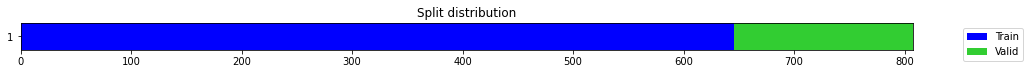

Start Train


RuntimeError: The size of tensor a (512) must match the size of tensor b (3300) at non-singleton dimension 3

In [35]:
from tsai.all import *
from tsai.all import TSStandardize, TSClassifier, InceptionTimePlus, ShowGraph, accuracy
q = df[df.Sentence_type == 'A']
tsdf = q[timepoint_cols]
x = tsdf.values.reshape(tsdf.shape[0],1,tsdf.shape[1])
y = q['phq_binary_label']
batch_tfms = TSStandardize()
clf = TSClassifier(x, y, arch=TSTPlus, batch_tfms=batch_tfms, metrics=accuracy, cbs=ShowGraph())
print("Start Train")
clf.fit_one_cycle(100, 3e-4)

In [22]:
# from tsai.all import *
# from tsai.all import TSStandardize, TSClassifier, InceptionTimePlus, ShowGraph, accuracy
def run_ts_transformer(df , timepoint_cols):
# A_df = df[df.Sentence_type == 'A']
    tsdf = df[timepoint_cols]
    x = tsdf.values.reshape(tsdf.shape[0],1,tsdf.shape[1])
    y = df['phq_binary_label']
    batch_tfms = TSStandardize()
    clf = TSClassifier(x, y, arch=TSTPlus, batch_tfms=batch_tfms, metrics=accuracy, cbs=ShowGraph())
    print("Start Train")
    clf.fit_one_cycle(100, 3e-4)
# clf.export("models/mv_clf.pkl")
# probas, target, preds = clf.get_X_preds(X[splits[0]], y[splits[0]])

    # return clf

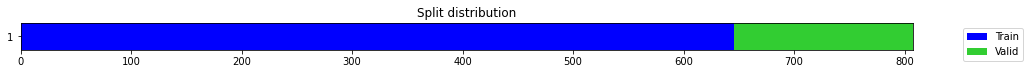

Start Train


RuntimeError: The size of tensor a (512) must match the size of tensor b (3300) at non-singleton dimension 3

In [23]:
run_ts_transformer(df[df.Sentence_type=='A'], timepoint_cols = timepoint_cols)

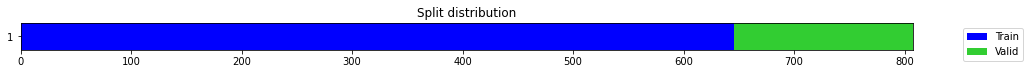

KeyboardInterrupt: 

KeyboardInterrupt: 

In [18]:
res_dict = {}
for cond in ["A","B","C","D"]:
    cond_df = df[df.Sentence_type == cond]
    res_dict["sc_transformers"] = run_ts_transformer(cond_df, timepoint_cols = timepoint_cols)